In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Prediction field
prediction = 'BarbaraCorcoranGotDeal'

# Numerical predictors to use
fields = ['Pitch.Number', 'Multiple.Entrepreneurs', 'Original.Ask.Amount', \
          'Original.Offered.Equity', 'Valuation.Requested', 'Barbara.Corcoran.Present', 'Mark.Cuban.Present', \
          'Lori.Greiner.Present', 'Robert.Herjavec.Present', 'Daymond.John.Present', 'Kevin.O.Leary.Present']

# Categorical predictors to use
categorical_fields = ['Pitchers.Gender']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sophomore Spring/ORIE 3120/ORIE 3120 Final Project/data/Shark Tank Processed.csv', encoding='latin-1')

# Strip periods from column names to allow statsmodels formulas to work
new_df = pd.DataFrame()
for col in df:
  new_df[col.replace('.', '')] = df[col]
df = new_df
prediction = prediction.replace('.', '')
fields = [s.replace('.', '') for s in fields]
categorical_fields = [s.replace('.', '') for s in categorical_fields]

# Add fields for if each shark invested
for shark in ['BarbaraCorcoran', 'MarkCuban', 'LoriGreiner', 'RobertHerjavec', 'DaymondJohn', 'KevinOLeary']:
  df[f'{shark}GotDeal'] = [1 if i > 0 else 0 for i in df[f'{shark}InvestmentAmount']]

df.head()

,SeasonNumber,SeasonStart,SeasonEnd,EpisodeNumber,PitchNumber,OriginalAirDate,StartupName,Industry,BusinessDescription,PitchersGender,...,LoriGreinerPresent,RobertHerjavecPresent,DaymondJohnPresent,KevinOLearyPresent,BarbaraCorcoranGotDeal,MarkCubanGotDeal,LoriGreinerGotDeal,RobertHerjavecGotDeal,DaymondJohnGotDeal,KevinOLearyGotDeal
0,1,08/09/2009,02/05/2010,1,1,08/09/2009,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,...,0,1,1,1,1,0,0,0,0,0
1,1,08/09/2009,02/05/2010,1,2,08/09/2009,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,...,0,1,1,1,1,0,0,0,1,0
2,1,08/09/2009,02/05/2010,1,3,08/09/2009,Wispots,Business Services,Wispots - Consumer Services,Male,...,0,1,1,1,0,0,0,0,0,0
3,1,08/09/2009,02/05/2010,1,4,08/09/2009,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,...,0,1,1,1,0,0,0,0,0,0
4,1,08/09/2009,02/05/2010,1,5,08/09/2009,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,...,0,1,1,1,0,0,0,0,0,0


In [ ]:
# Fitting a model with all the data
predictors = ' + '.join(fields) + ' + ' + ' + '.join([f'C({field})' for field in categorical_fields])
model = smf.logit(f'{prediction} ~ {predictors}', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.243033
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     BarbaraCorcoranGotDeal   No. Observations:                 1097
Model:                              Logit   Df Residuals:                     1083
Method:                               MLE   Df Model:                           13
Date:                    Sat, 06 May 2023   Pseudo R-squ.:                  0.2299
Time:                            18:04:44   Log-Likelihood:                -266.61
converged:                           True   LL-Null:                       -346.18
Covariance Type:                nonrobust   LLR p-value:                 2.946e-27
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.1030      1.476     -2.779      0.005      -6.996      -1.210
C(PitchersGender)[T.Male]     -0.7216      0.247     -2.926      0.003      -1.205      -0.238
C(PitchersGender)[T.Mixed]    -1.0171      0.386     -2.632      0.008      -1.775      -0.260
PitchNumber                    0.0013      0.001      1.906      0.057   -3.74e-05       0.003
MultipleEntrepreneurs          0.5804      0.276      2.103      0.035       0.040       1.121
OriginalAskAmount           9.545e-07   7.01e-07      1.361      0.173    -4.2e-07    2.33e-06
OriginalOfferedEquity         -0.0401      0.018     -2.225      0.026      -0.076      -0.005
ValuationRequested          -3.24e-07   1.04e-07     -3.122      0.002   -5.27e-07   -1.21e-07
BarbaraCorcoranPresent         3.8570      0.783      4.925      0.000       2.322       5.392
MarkCubanPresent              -0.7110      0.384     -1.853      0.064      -1.463       0.041
LoriGreinerPresent            -0.3221      0.606     -0.531      0.595      -1.510       0.866
RobertHerjavecPresent          0.2842      0.384      0.739      0.460      -0.469       1.038
DaymondJohnPresent            -0.0801      0.441     -0.182      0.856      -0.945       0.785
KevinOLearyPresent             0.0873      0.674      0.129      0.897      -1.234       1.409
==============================================================================================
"""

In [ ]:
# Fit a model using a train-test split

# Randomize dataframe
df = df.sample(frac=1).reset_index(drop=True)

# Select rows
test_size = 0.25
train = df.loc[:np.floor(df[prediction].count() * test_size)]
test = df.loc[np.ceil(df[prediction].count() * test_size):]

model = smf.logit(f'{prediction} ~ {predictors}', data=train).fit()
model.summary()

         Current function value: 0.254892
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     BarbaraCorcoranGotDeal   No. Observations:                  275
Model:                              Logit   Df Residuals:                      261
Method:                               MLE   Df Model:                           13
Date:                    Sat, 06 May 2023   Pseudo R-squ.:                  0.2434
Time:                            18:04:44   Log-Likelihood:                -70.095
converged:                          False   LL-Null:                       -92.649
Covariance Type:                nonrobust   LLR p-value:                 2.008e-05
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -27.6507   2.12e+04     -0.001      0.999   -4.16e+04    4.15e+04
C(PitchersGender)[T.Male]     -0.3099      0.474     -0.654      0.513      -1.239       0.619
C(PitchersGender)[T.Mixed]    -0.7107      0.854     -0.832      0.405      -2.385       0.963
PitchNumber                    0.0026      0.001      1.979      0.048    2.46e-05       0.005
MultipleEntrepreneurs          0.0528      0.596      0.089      0.929      -1.115       1.221
OriginalAskAmount           1.781e-06    8.4e-07      2.120      0.034    1.35e-07    3.43e-06
OriginalOfferedEquity         -0.0495      0.040     -1.251      0.211      -0.127       0.028
ValuationRequested         -3.796e-07    1.6e-07     -2.376      0.018   -6.93e-07   -6.64e-08
BarbaraCorcoranPresent         4.3467      1.398      3.109      0.002       1.607       7.087
MarkCubanPresent              -0.5547      0.844     -0.657      0.511      -2.209       1.100
LoriGreinerPresent             0.3715      1.188      0.313      0.755      -1.957       2.700
RobertHerjavecPresent          1.1612      0.740      1.570      0.117      -0.289       2.611
DaymondJohnPresent             0.7762      0.902      0.861      0.389      -0.991       2.544
KevinOLearyPresent            20.9887   2.12e+04      0.001      0.999   -4.15e+04    4.16e+04
==============================================================================================
"""

In [ ]:
# Create predictions on test data
all_predictions = model.predict(test)
y_test = test[prediction]

In [ ]:
def true_positives(pred, real):
  total = 0
  for i, val in enumerate(real):
    if val == 1 and pred[i] == val:
      total += 1
  return total

In [ ]:
def true_negatives(pred, real):
  total = 0
  for i, val in enumerate(real):
    if val == 0 and pred[i] == val:
      total += 1
  return total

In [ ]:
def false_positives(pred, real):
  total = 0
  for i, val in enumerate(real):
    if val == 0 and pred[i] != val:
      total += 1
  return total

In [ ]:
def false_negatives(pred, real):
  total = 0
  for i, val in enumerate(real):
    if val == 1 and pred[i] != val:
      total += 1
  return total

In [ ]:
def fpr_tpr(threshold):
  predictions = [1 if x >= threshold else 0 for x in all_predictions]
  tp = true_positives(predictions, y_test)
  tn = true_negatives(predictions, y_test)
  fp = false_positives(predictions, y_test)
  fn = false_negatives(predictions, y_test)
  return (fp/(fp+tn) , tp/(tp+fn))

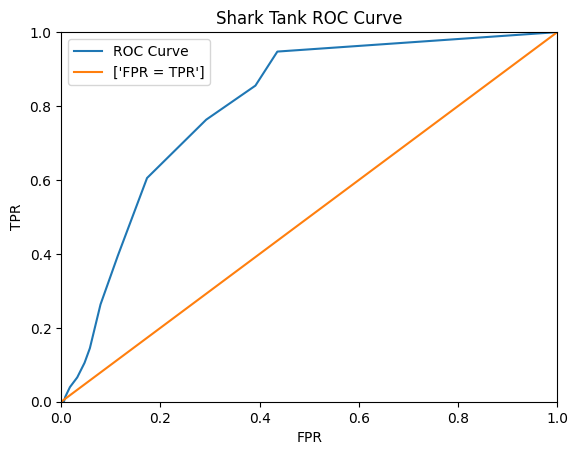

In [ ]:
fprs = []
tprs = []
for threshold in np.arange(0, 1.05, 0.05):
  fpr, tpr = fpr_tpr(threshold)
  fprs.append(fpr)
  tprs.append(tpr)
plt.plot(fprs, tprs)
plt.plot([0,1],[0,1])
plt.legend(['ROC Curve', ['FPR = TPR']])
plt.axis([0.0, 1.0, 0.0, 1.0])
plt.title('Shark Tank ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

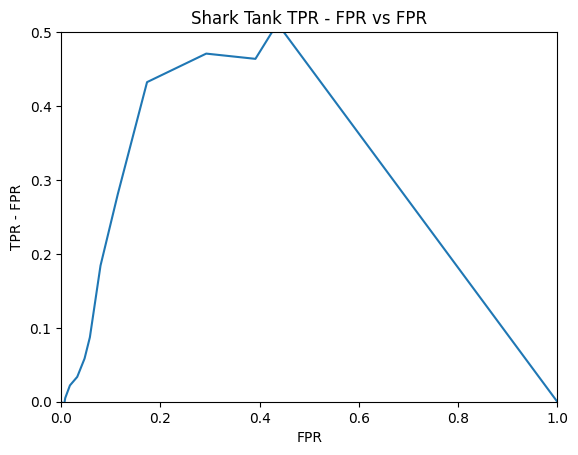

In [ ]:
fprs, tprs = np.array(fprs), np.array(tprs)
plt.plot(fprs, tprs-fprs)
plt.axis([0.0, 1.0, 0.0, 0.5])
plt.title('Shark Tank TPR - FPR vs FPR')
plt.xlabel('FPR')
plt.ylabel('TPR - FPR')
plt.show()